# Normalization scaling 

In [304]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [249]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [251]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

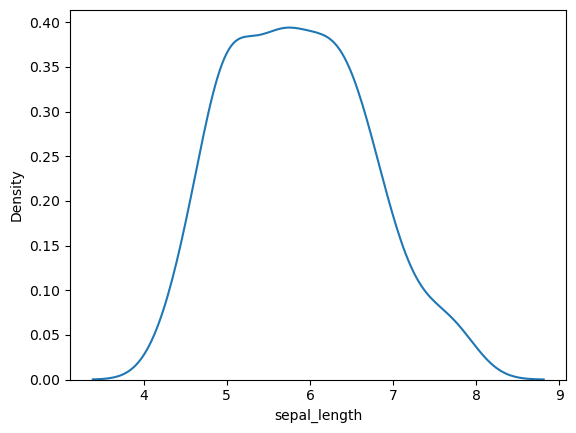

In [253]:
sns.kdeplot(iris['sepal_length'])

<Axes: xlabel='petal_length', ylabel='Density'>

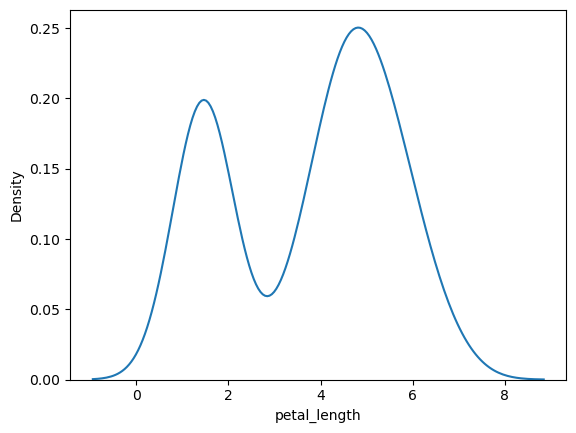

In [255]:
sns.kdeplot(iris['petal_length'])

In [261]:
X = iris.drop("species", axis=1)   
y = iris["species"] 

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [265]:
X_train.shape,y_train.shape

((120, 4), (120,))

In [271]:
X_test.shape,y_test.shape

((30, 4), (30,))

In [273]:
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [275]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [277]:
import numpy as np
np.round(X_train.describe(), 1)

,sepal_length,sepal_width,petal_length,petal_width
count,120.0,120.0,120.0,120.0
mean,5.8,3.1,3.7,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.5,0.3
50%,5.8,3.0,4.2,1.3
75%,6.4,3.4,5.1,1.8
max,7.7,4.4,6.7,2.5


In [279]:
np.round(X_train_scaled.describe(), 1)

,sepal_length,sepal_width,petal_length,petal_width
count,120.0,120.0,120.0,120.0
mean,0.4,0.4,0.5,0.5
std,0.2,0.2,0.3,0.3
min,0.0,0.0,0.0,0.0
25%,0.2,0.3,0.1,0.1
50%,0.4,0.4,0.6,0.5
75%,0.6,0.6,0.7,0.7
max,1.0,1.0,1.0,1.0


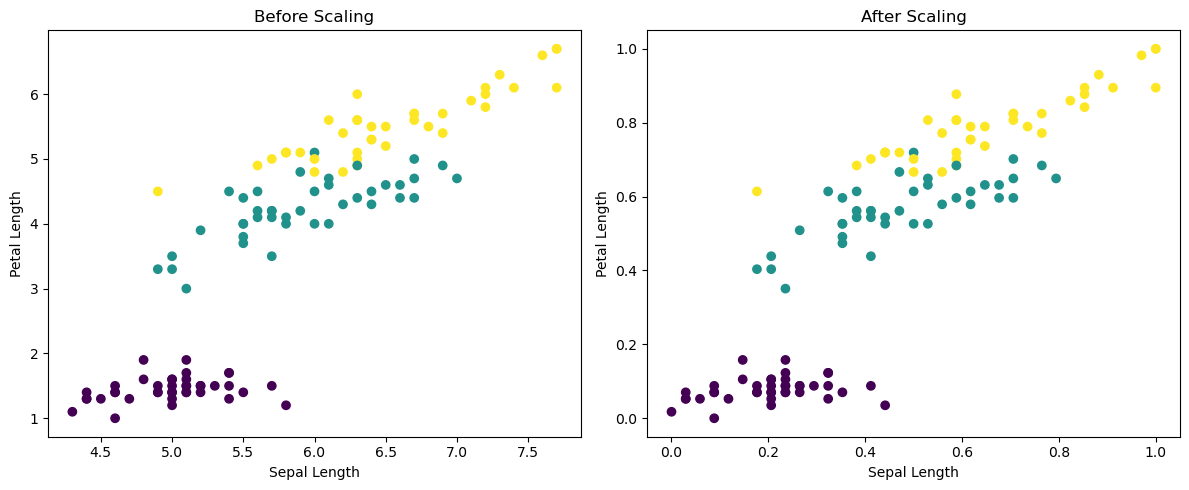

In [281]:
import matplotlib.pyplot as plt

color_labels = y_train.astype('category').cat.codes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(X_train['sepal_length'], X_train['petal_length'], c=color_labels, cmap='viridis')
ax1.set_title("Before Scaling")
ax1.set_xlabel("Sepal Length")
ax1.set_ylabel("Petal Length")

ax2.scatter(X_train_scaled['sepal_length'], X_train_scaled['petal_length'], c=color_labels, cmap='viridis')
ax2.set_title("After Scaling")
ax2.set_xlabel("Sepal Length")
ax2.set_ylabel("Petal Length")

plt.tight_layout()
plt.show()


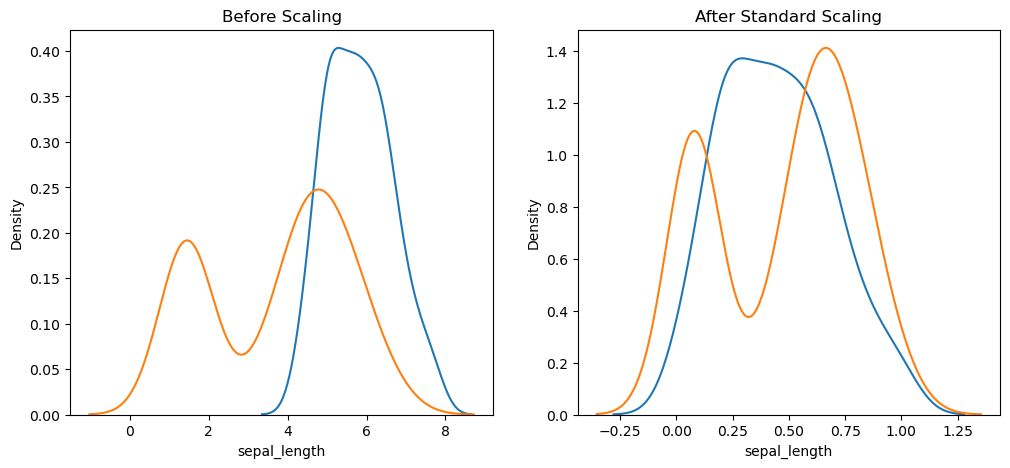

In [283]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['sepal_length'], ax=ax1)
sns.kdeplot(X_train['petal_length'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['sepal_length'], ax=ax2)
sns.kdeplot(X_train_scaled['petal_length'], ax=ax2)
plt.show()

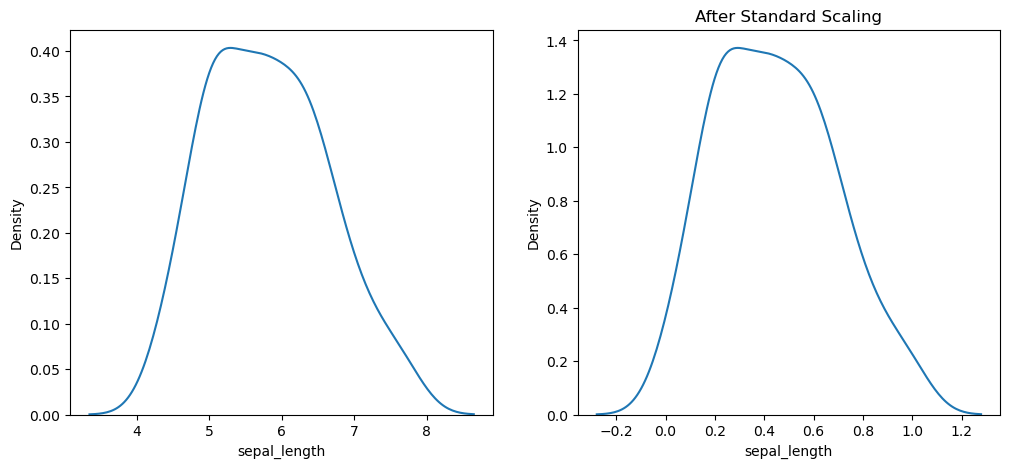

In [285]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.kdeplot(X_train['sepal_length'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['sepal_length'], ax=ax2)
plt.show()

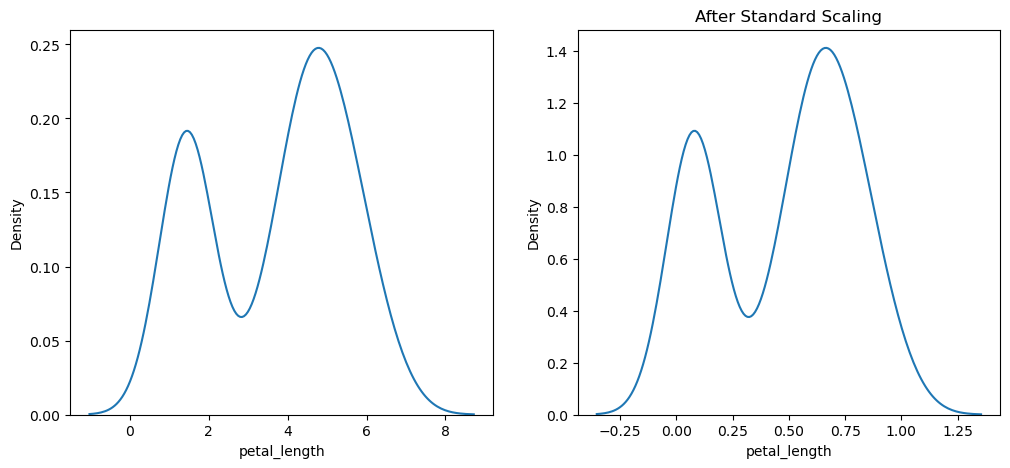

In [287]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

sns.kdeplot(X_train['petal_length'], ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['petal_length'], ax=ax2)
plt.show()

In [289]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [291]:
y_pred = model.predict(X_test_scaled)

## With MinMax Accuracy 

In [293]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


## Without MinMsx scaling accuracy

In [295]:
y_pred = model.predict(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.36666666666666664
